In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.cluster import KMeans
import re
import preprocessor as p#forming a separate feature for cleaned tweets
import string
import nltk
from nltk.corpus import stopwords
from sklearn.metrics import adjusted_rand_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
data = []
for file in range(15):
    data.append(open('Tweet-Data/digital_twin_tweets-'+str(2006+file)+'.jl'))  #hier muessen wir ggf. immer anpassen wer gerade arbeitet, du musst fuer dich nur ../ am Anfang hinschreiben
    

In [3]:
doc = []
for file in data:
    for line in file:
        doc.append(json.loads(line))

In [4]:
len(doc)

909

In [5]:
type(doc[1])

dict

In [6]:
doc[1].keys()

dict_keys(['http_status', 'year', 'params', 'response'])

In [7]:
doc[1]['response']['data']
    

[{'public_metrics': {'retweet_count': 0,
   'reply_count': 0,
   'like_count': 0,
   'quote_count': 0},
  'possibly_sensitive': False,
  'lang': 'en',
  'conversation_id': '196991032',
  'author_id': '5544032',
  'reply_settings': 'everyone',
  'entities': {'annotations': [{'start': 0,
     'end': 4,
     'probability': 0.4497,
     'type': 'Organization',
     'normalized_text': 'Bajaj'},
    {'start': 42,
     'end': 51,
     'probability': 0.4462,
     'type': 'Product',
     'normalized_text': 'Bajaj Auto'}]},
  'source': 'Twitter Web Client',
  'text': 'Bajaj has a new growth engine, literally: Bajaj Auto, unveiled a new engine platform, digital twin spar.. http://tinyurl.com/226b89',
  'id': '196991032',
  'created_at': '2007-08-09T22:13:01.000Z'},
 {'public_metrics': {'retweet_count': 0,
   'reply_count': 0,
   'like_count': 0,
   'quote_count': 0},
  'possibly_sensitive': False,
  'lang': 'tl',
  'conversation_id': '195910282',
  'author_id': '5544032',
  'reply_settings': 'eve

In [8]:
emptyList = []
for dict in doc:
    emptyList.append(dict['response'])
    

In [9]:
len(emptyList)

909

In [10]:
doc[0]['response'].keys()


dict_keys(['meta'])

In [11]:
def check(dictionary):
    if dictionary['result_count'] == 0: return False
    else: return True

In [12]:
emptyData = []
for dict in emptyList:
    if check(dict['meta']): emptyData.append(dict['data'])

In [13]:
len(emptyData)


908

In [14]:
type(emptyData)

list

In [15]:
pd.DataFrame(emptyData[3])

,text,conversation_id,created_at,author_id,lang,id,source,public_metrics,reply_settings,entities,possibly_sensitive,referenced_tweets,in_reply_to_user_id
0,Find Your Digital Twin on Facebook: If novelty...,6315780112,2009-12-03T21:35:26.000Z,18248248,en,6315780112,twitterfeed,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",everyone,"{'annotations': [{'start': 26, 'end': 33, 'pro...",False,NaN,NaN
1,Reading: Find Your Digital Twin on Facebook: I...,6315765231,2009-12-03T21:34:53.000Z,11029722,en,6315765231,twitterfeed,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",everyone,"{'annotations': [{'start': 35, 'end': 42, 'pro...",False,NaN,NaN
2,RT @Civrock: Find Your Digital Twin on Faceboo...,6315763272,2009-12-03T21:34:49.000Z,85275659,en,6315763272,Twitter Web Client,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",everyone,"{'annotations': [{'start': 39, 'end': 46, 'pro...",False,"[{'type': 'retweeted', 'id': '6315134524'}]",NaN
3,Anyone else think this is creepy? RT @mashable...,6315762162,2009-12-03T21:34:46.000Z,59682118,en,6315762162,TweetMeme,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",everyone,"{'annotations': [{'start': 73, 'end': 80, 'pro...",False,NaN,NaN
4,@KIRO7Seattle today @jennihogan is my digital ...,6315705239,2009-12-03T21:34:21.000Z,17566614,en,6315750888,Twitter Web Client,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",everyone,"{'mentions': [{'start': 0, 'end': 13, 'usernam...",False,"[{'type': 'replied_to', 'id': '6315705239'}]",21116401
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,@eddieizzard what's it like having a digital t...,1360098235,2009-03-20T13:29:03.000Z,19819153,en,1360175352,Twitter Web Client,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",everyone,"{'mentions': [{'start': 0, 'end': 12, 'usernam...",False,"[{'type': 'replied_to', 'id': '1360098235'}]",24447643
178,@tchrischan @mmillonida I just saw the commers...,1282107850,2009-03-05T05:13:34.000Z,14620646,en,1282107850,Twitter Web Client,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",everyone,"{'annotations': [{'start': 52, 'end': 54, 'pro...",False,NaN,14260862
179,@theexperthand The new Platina has Digital Twi...,1175802137,2009-02-04T10:07:55.000Z,16508889,en,1175854564,Twitter Web Client,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",everyone,"{'annotations': [{'start': 23, 'end': 52, 'pro...",False,"[{'type': 'replied_to', 'id': '1175802137'}]",5548782
180,"What about the term ""Identity Hostage?"" Does t...",1162413627,2009-01-30T18:28:33.000Z,19568570,en,1162413627,Twitter Web Client,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",everyone,NaN,False,NaN,NaN


In [16]:
df = pd.DataFrame(emptyData[0])

In [17]:
for obj in range(1,len(emptyData)):
    df = df.append(pd.DataFrame(emptyData[obj]))
    #    pd.concat(df, pd.DataFrame(obj))

In [18]:
df.shape

(431406, 17)

In [19]:
df.head()

,public_metrics,possibly_sensitive,lang,conversation_id,author_id,reply_settings,entities,source,text,id,created_at,referenced_tweets,in_reply_to_user_id,geo,attachments,context_annotations,withheld
0,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",False,en,196991032,5544032,everyone,"{'annotations': [{'start': 0, 'end': 4, 'proba...",Twitter Web Client,"Bajaj has a new growth engine, literally: Baja...",196991032,2007-08-09T22:13:01.000Z,NaN,NaN,NaN,NaN,NaN,NaN
1,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",False,tl,195910282,5544032,everyone,NaN,Twitter Web Client,Bajaj Auto's DTS-Si engine offers 109km/l: Baj...,195910282,2007-08-09T11:12:34.000Z,NaN,NaN,NaN,NaN,NaN,NaN
0,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",False,en,1062939250,17278675,everyone,NaN,Twitter Web Client,Twin Cities TV viewers: Get ready for digital ...,1062939250,2008-12-17T15:35:56.000Z,NaN,NaN,NaN,NaN,NaN,NaN
1,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",False,en,1061242451,13001192,everyone,NaN,Twitter Web Client,Twin Cities TV viewers: Get ready for digital ...,1061242451,2008-12-16T19:31:41.000Z,NaN,NaN,NaN,NaN,NaN,NaN
2,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",False,en,1001144234,14263808,everyone,"{'mentions': [{'start': 0, 'end': 10, 'usernam...",Twitter Web Client,@mitchjoel I would agree and add that products...,1008571783,2008-11-16T20:04:21.000Z,"[{'type': 'replied_to', 'id': '1001144234'}]",792907,NaN,NaN,NaN,NaN


In [20]:
df_clean = df

In [21]:
len(df_clean)

431406

In [22]:
#df_clean.to_pickle("../dummy.pkl")

In [23]:
#df_clean = pd.read_pickle("../dummy.pkl")

In [24]:
df_clean = df_clean[['lang','author_id','source','text', 'created_at']]

In [25]:
def isRT(text):
        if text.startswith("RT"): return "True"
        else: return "False"

In [26]:
df_clean['is_RT'] = df_clean['text'].map(isRT)

<ipython-input-26-7551cb54dc09>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['is_RT'] = df_clean['text'].map(isRT)


In [27]:
df_clean = df_clean[df_clean['is_RT']=="False"]

In [28]:
df_clean.shape

(193365, 6)

In [29]:
import seaborn as sns


C:\Users\Jonas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='lang', ylabel='count'>

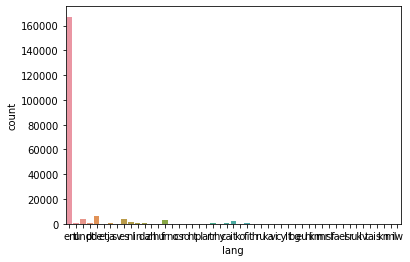

In [30]:
sns.countplot(df_clean['lang'])

In [31]:
df_lang = df_clean.copy()
df_lang = df_lang.groupby('lang').agg({'lang':'count'})
df_lang

,lang
lang,
ar,101
bg,7
ca,339
cs,112
cy,32
da,274
de,6053
el,4
en,167162


In [32]:
df_clean = df_clean[(df_clean['lang'] == "en")]

In [33]:
df_clean = df_clean.drop(['is_RT'], axis=1)

In [34]:
df_clean.nunique()

lang               1
author_id      46201
source          1492
text          160426
created_at    165232
dtype: int64

In [35]:
def createdAt(date):
    return date.split('-')[:1][0]
    

In [36]:
df_clean['year'] = df_clean.created_at.map(createdAt)
df_clean.head(20)

,lang,author_id,source,text,created_at,year
0,en,5544032,Twitter Web Client,"Bajaj has a new growth engine, literally: Baja...",2007-08-09T22:13:01.000Z,2007
0,en,17278675,Twitter Web Client,Twin Cities TV viewers: Get ready for digital ...,2008-12-17T15:35:56.000Z,2008
1,en,13001192,Twitter Web Client,Twin Cities TV viewers: Get ready for digital ...,2008-12-16T19:31:41.000Z,2008
2,en,14263808,Twitter Web Client,@mitchjoel I would agree and add that products...,2008-11-16T20:04:21.000Z,2008
3,en,7105382,Twitter Web Client,"Tell all the trends, any digital twins, any sk...",2008-11-02T10:26:03.000Z,2008
4,en,9776512,Twitter Web Client,Good Deal: 2GB MICRO SECURE DIGITAL TWIN PACK ...,2008-06-14T01:27:48.000Z,2008
5,en,2643021,Twitter Web Client,anyone used this 3G Digital Twin SIM Card Adap...,2008-04-11T14:21:39.000Z,2008
0,en,34405329,Twitter Web Client,Find Your Digital Twin on Facebook - http://sh...,2009-12-28T12:13:35.000Z,2009
1,en,871631,FriendFeed,Find Your Digital Twin on Facebook http://ff.i...,2009-12-27T05:01:19.000Z,2009
2,en,73833799,Twitter Web Client,Find Your Digital Twin on Facebook (Mashable) ...,2009-12-27T03:25:50.000Z,2009


In [37]:
df_clean = df_clean.drop(columns=['created_at', 'lang'], axis=1)

In [38]:
df_clean.head()

,author_id,source,text,year
0,5544032,Twitter Web Client,"Bajaj has a new growth engine, literally: Baja...",2007
0,17278675,Twitter Web Client,Twin Cities TV viewers: Get ready for digital ...,2008
1,13001192,Twitter Web Client,Twin Cities TV viewers: Get ready for digital ...,2008
2,14263808,Twitter Web Client,@mitchjoel I would agree and add that products...,2008
3,7105382,Twitter Web Client,"Tell all the trends, any digital twins, any sk...",2008


In [39]:
df_clean['hashtag'] = df_clean['text'].apply(lambda x: re.findall(r"#(\w+)", x))

In [40]:
df_clean

,author_id,source,text,year,hashtag
0,5544032,Twitter Web Client,"Bajaj has a new growth engine, literally: Baja...",2007,[]
0,17278675,Twitter Web Client,Twin Cities TV viewers: Get ready for digital ...,2008,[]
1,13001192,Twitter Web Client,Twin Cities TV viewers: Get ready for digital ...,2008,[]
2,14263808,Twitter Web Client,@mitchjoel I would agree and add that products...,2008,[]
3,7105382,Twitter Web Client,"Tell all the trends, any digital twins, any sk...",2008,[]
...,...,...,...,...,...
278,143783750,Twitter for Android,"Digital Twin, a part of the industrial future ...",2020,"[digitalization, oilandgas, data, oil, gas, Si..."
283,28119151,dlvr.it,LOOKING AHEAD 2020: GET TECH SMART - Mumbai Mi...,2020,"[digitaltwins, technology, trends]"
284,1104943478180536320,Hootsuite Inc.,#Digitaltwins is so important right now becaus...,2020,"[Digitaltwins, digitaltwins, digitaltwin, iot,..."
288,106517778,Hootsuite Inc.,Will the #digitaltwin disrupt the #constructio...,2020,"[digitaltwin, construction, IoT, AI, artificia..."


In [41]:
#import tensorflow_hub as hub

#embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")


In [42]:
df_clean.to_pickle("digital_twin.plk")

In [62]:
df_clean.to_csv('digital_twin.csv')

In [43]:
X = df_clean.to_numpy()

In [44]:
X.shape

(167162, 5)

### Clean Text

In [45]:
text = df_clean['text']

In [46]:
len(text)

167162

In [47]:
text.nunique()

160426

In [48]:
text = text.tolist()

In [49]:
#installing tweet-preprocessor
!pip install tweet-preprocessor

In [50]:

for i,v in enumerate(text):
    text[i] = p.clean(v)

In [51]:
text[:10]

['Bajaj has a new growth engine, literally: Bajaj Auto, unveiled a new engine platform, digital twin spar..',
 'Twin Cities TV viewers: Get ready for digital : Twin Cities television stations want to get viewers ready for th..',
 'Twin Cities TV viewers: Get ready for digital : Twin Cities television stations want to get viewers ready for th..',
 'I would agree and add that products with no digital twin like TVs are also disrupted, by the ability to price check on the fly!',
 'Tell all the trends, any digital twins, any skinny make-up, fear or kid, shadow or pet, any fancy clone or robot waiter',
 'Good Deal: GB MICRO SECURE DIGITAL TWIN PACK / KINGSTON $15.99:',
 'anyone used this G Digital Twin SIM Card Adaptor .. you have to cut your sim card??',
 'Find Your Digital Twin on Facebook -',
 'Find Your Digital Twin on Facebook',
 'Find Your Digital Twin on Facebook (Mashable) -']

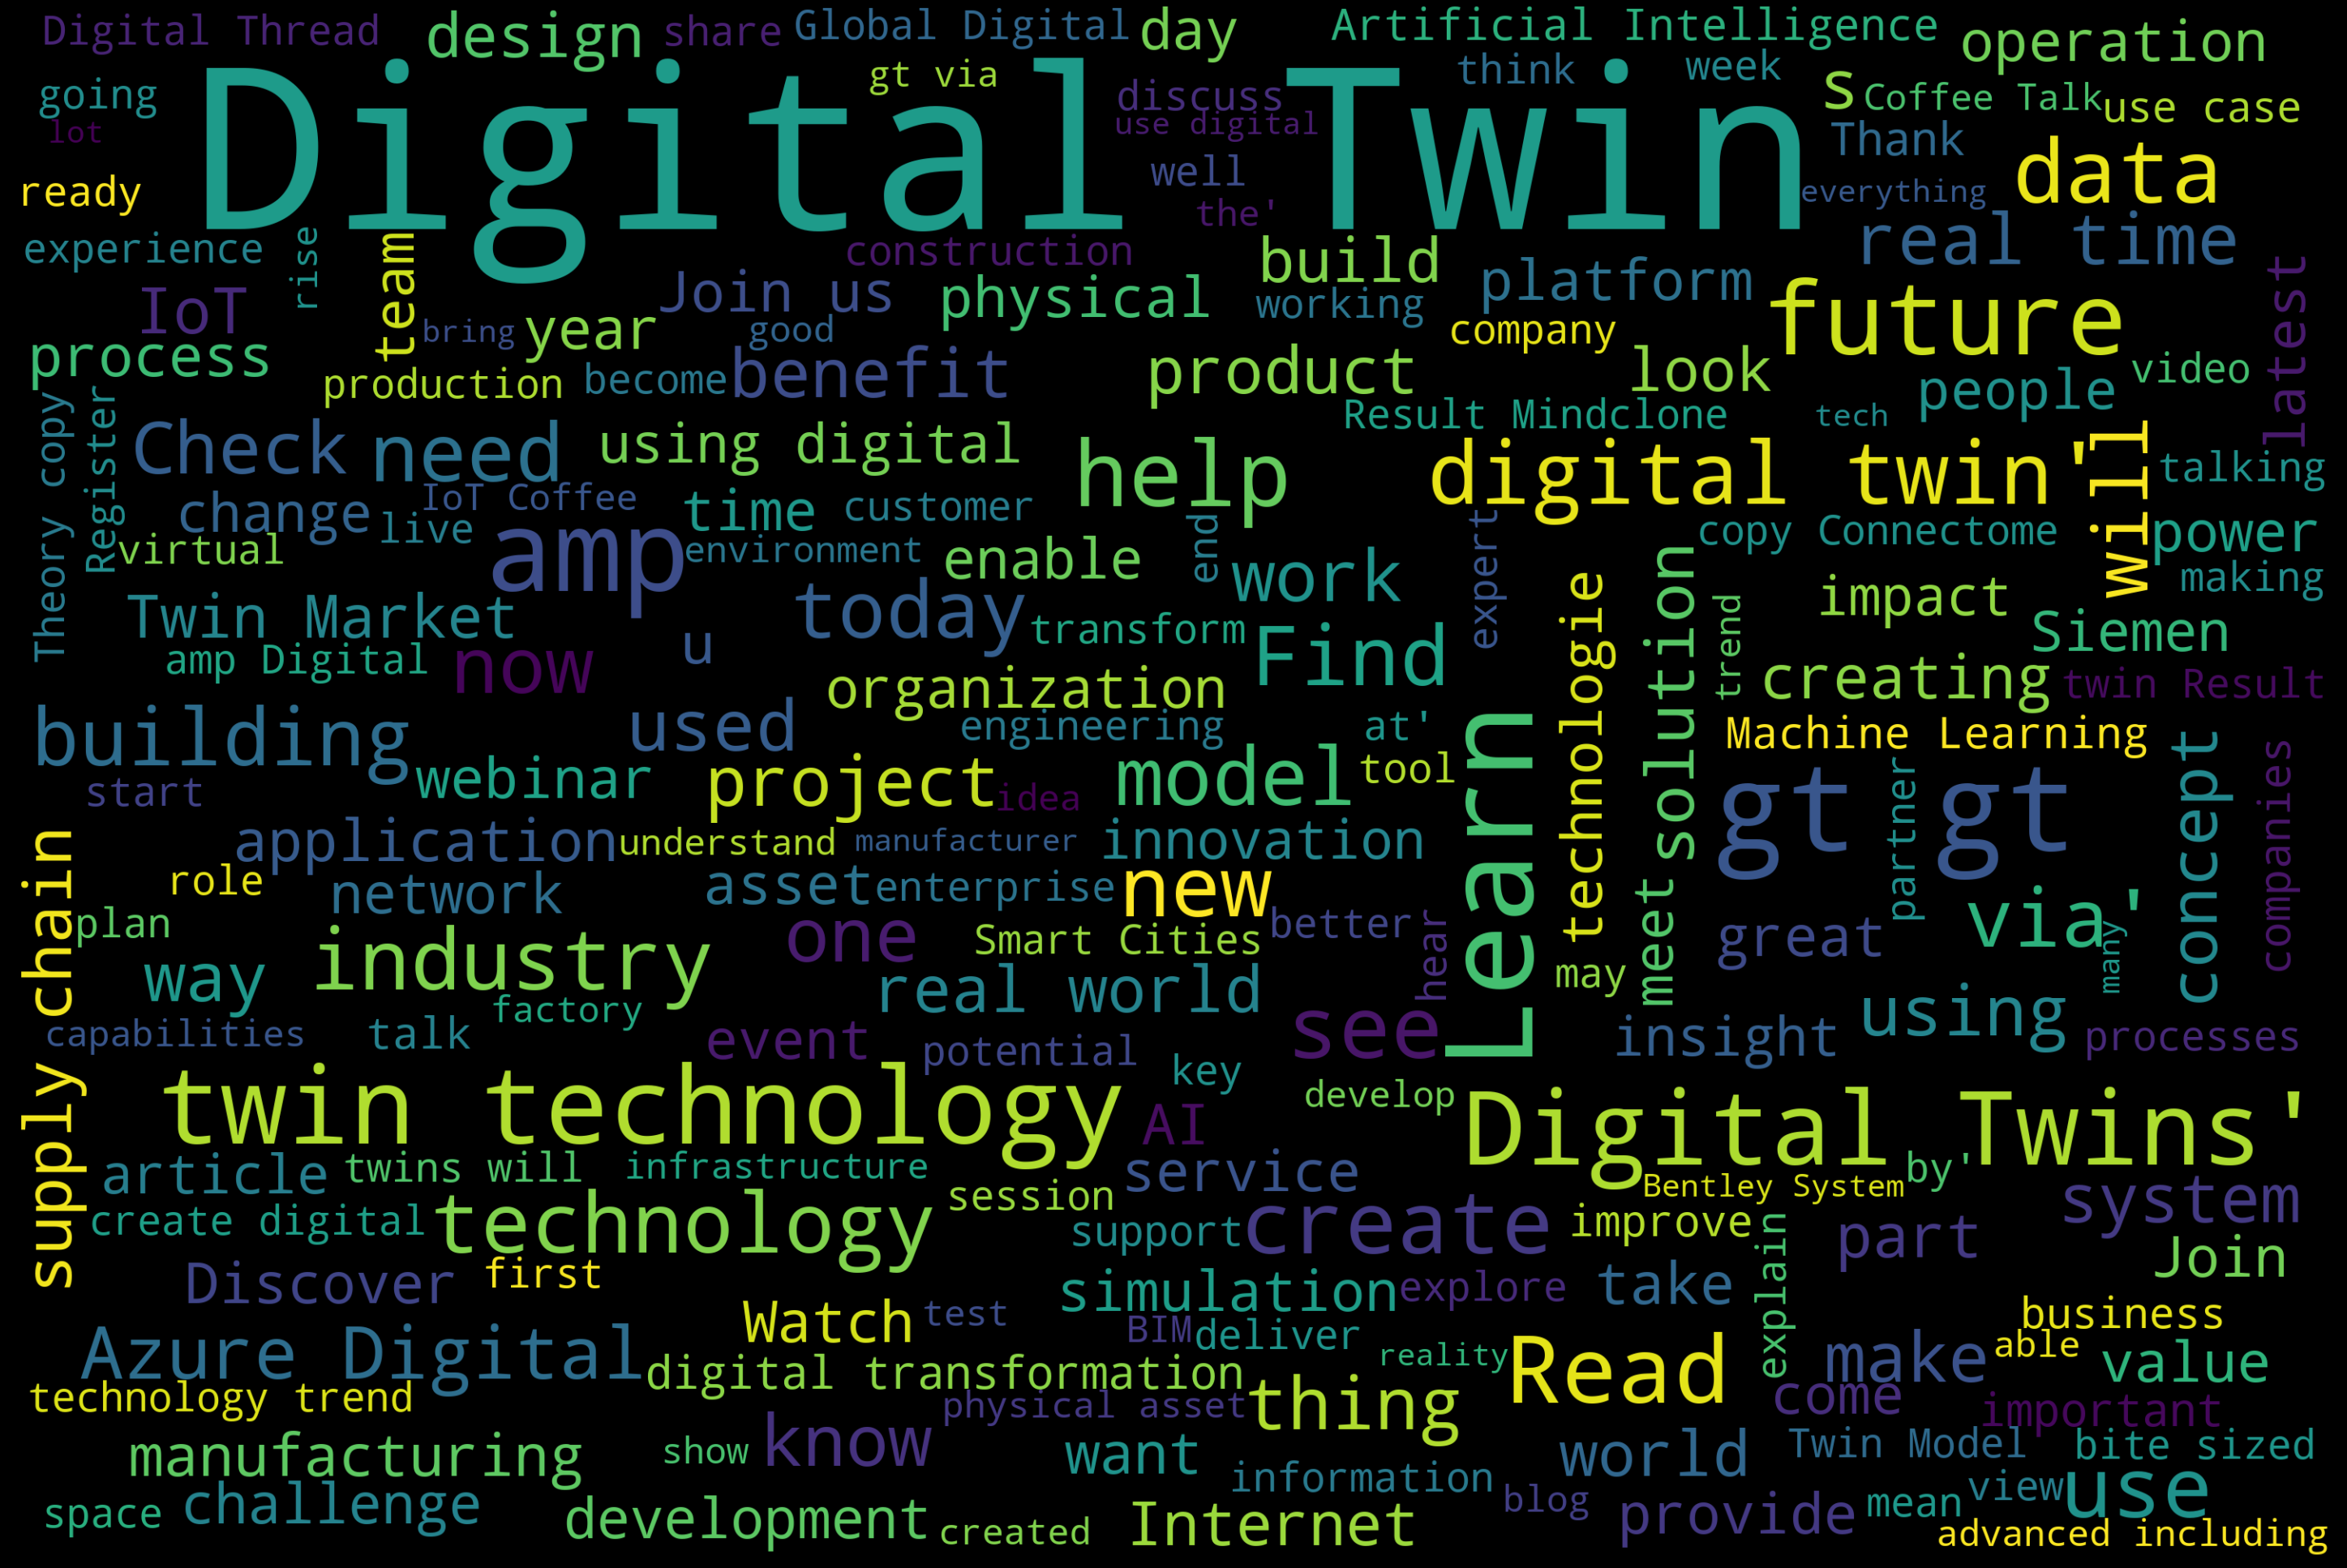

In [52]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [53]:
pd.DataFrame(text).to_pickle("../text_preprocessing")

In [54]:
def txt_cleaner(text):
    
    text = text.encode(encoding="ascii", errors="ignore")
    text = text.decode() # removing unicode from the text 
    
    text = p.clean(text)
    
    text = text.lower() #lowering all the text
    
    punct = set(string.punctuation)
    text = "".join([ch for ch in text if ch not in punct]) #remove punctation
    
    stop_words = set(stopwords.words("english"))
    text = " ".join([word for word in text.split() if word not in stop_words]) #remove stopwords
    # try out stemming and lemmatization
    return text

In [55]:
    eng_txt = "If any of us was born, in Germany!!! My UNCLE @Uncle would be Bud&dys with #Hotler &#38; du Wöschtla alde fralle.!:!:!:"
    eng_txt = txt_cleaner(eng_txt)
    print(eng_txt)

us born germany uncle would buddys du wschtla alde fralle


In [56]:
df_clean['text'] = df_clean.text.map(txt_cleaner)

In [57]:
df_clean['text']

0      bajaj new growth engine literally bajaj auto u...
0      twin cities tv viewers get ready digital twin ...
1      twin cities tv viewers get ready digital twin ...
2      would agree add products digital twin like tvs...
3      tell trends digital twins skinny makeup fear k...
                             ...                        
278                  digital twin part industrial future
283           looking ahead get tech smart mumbai mirror
284    important right provides framework accomplish ...
288                                 disrupt faster think
289    document worth reading digital twin enabling t...
Name: text, Length: 167162, dtype: object

In [58]:
df_clean = df_clean.drop_duplicates(subset=['text'])

In [59]:
#pd.DataFrame(text).to_pickle("../pickles/clean_digital_twin.plk")

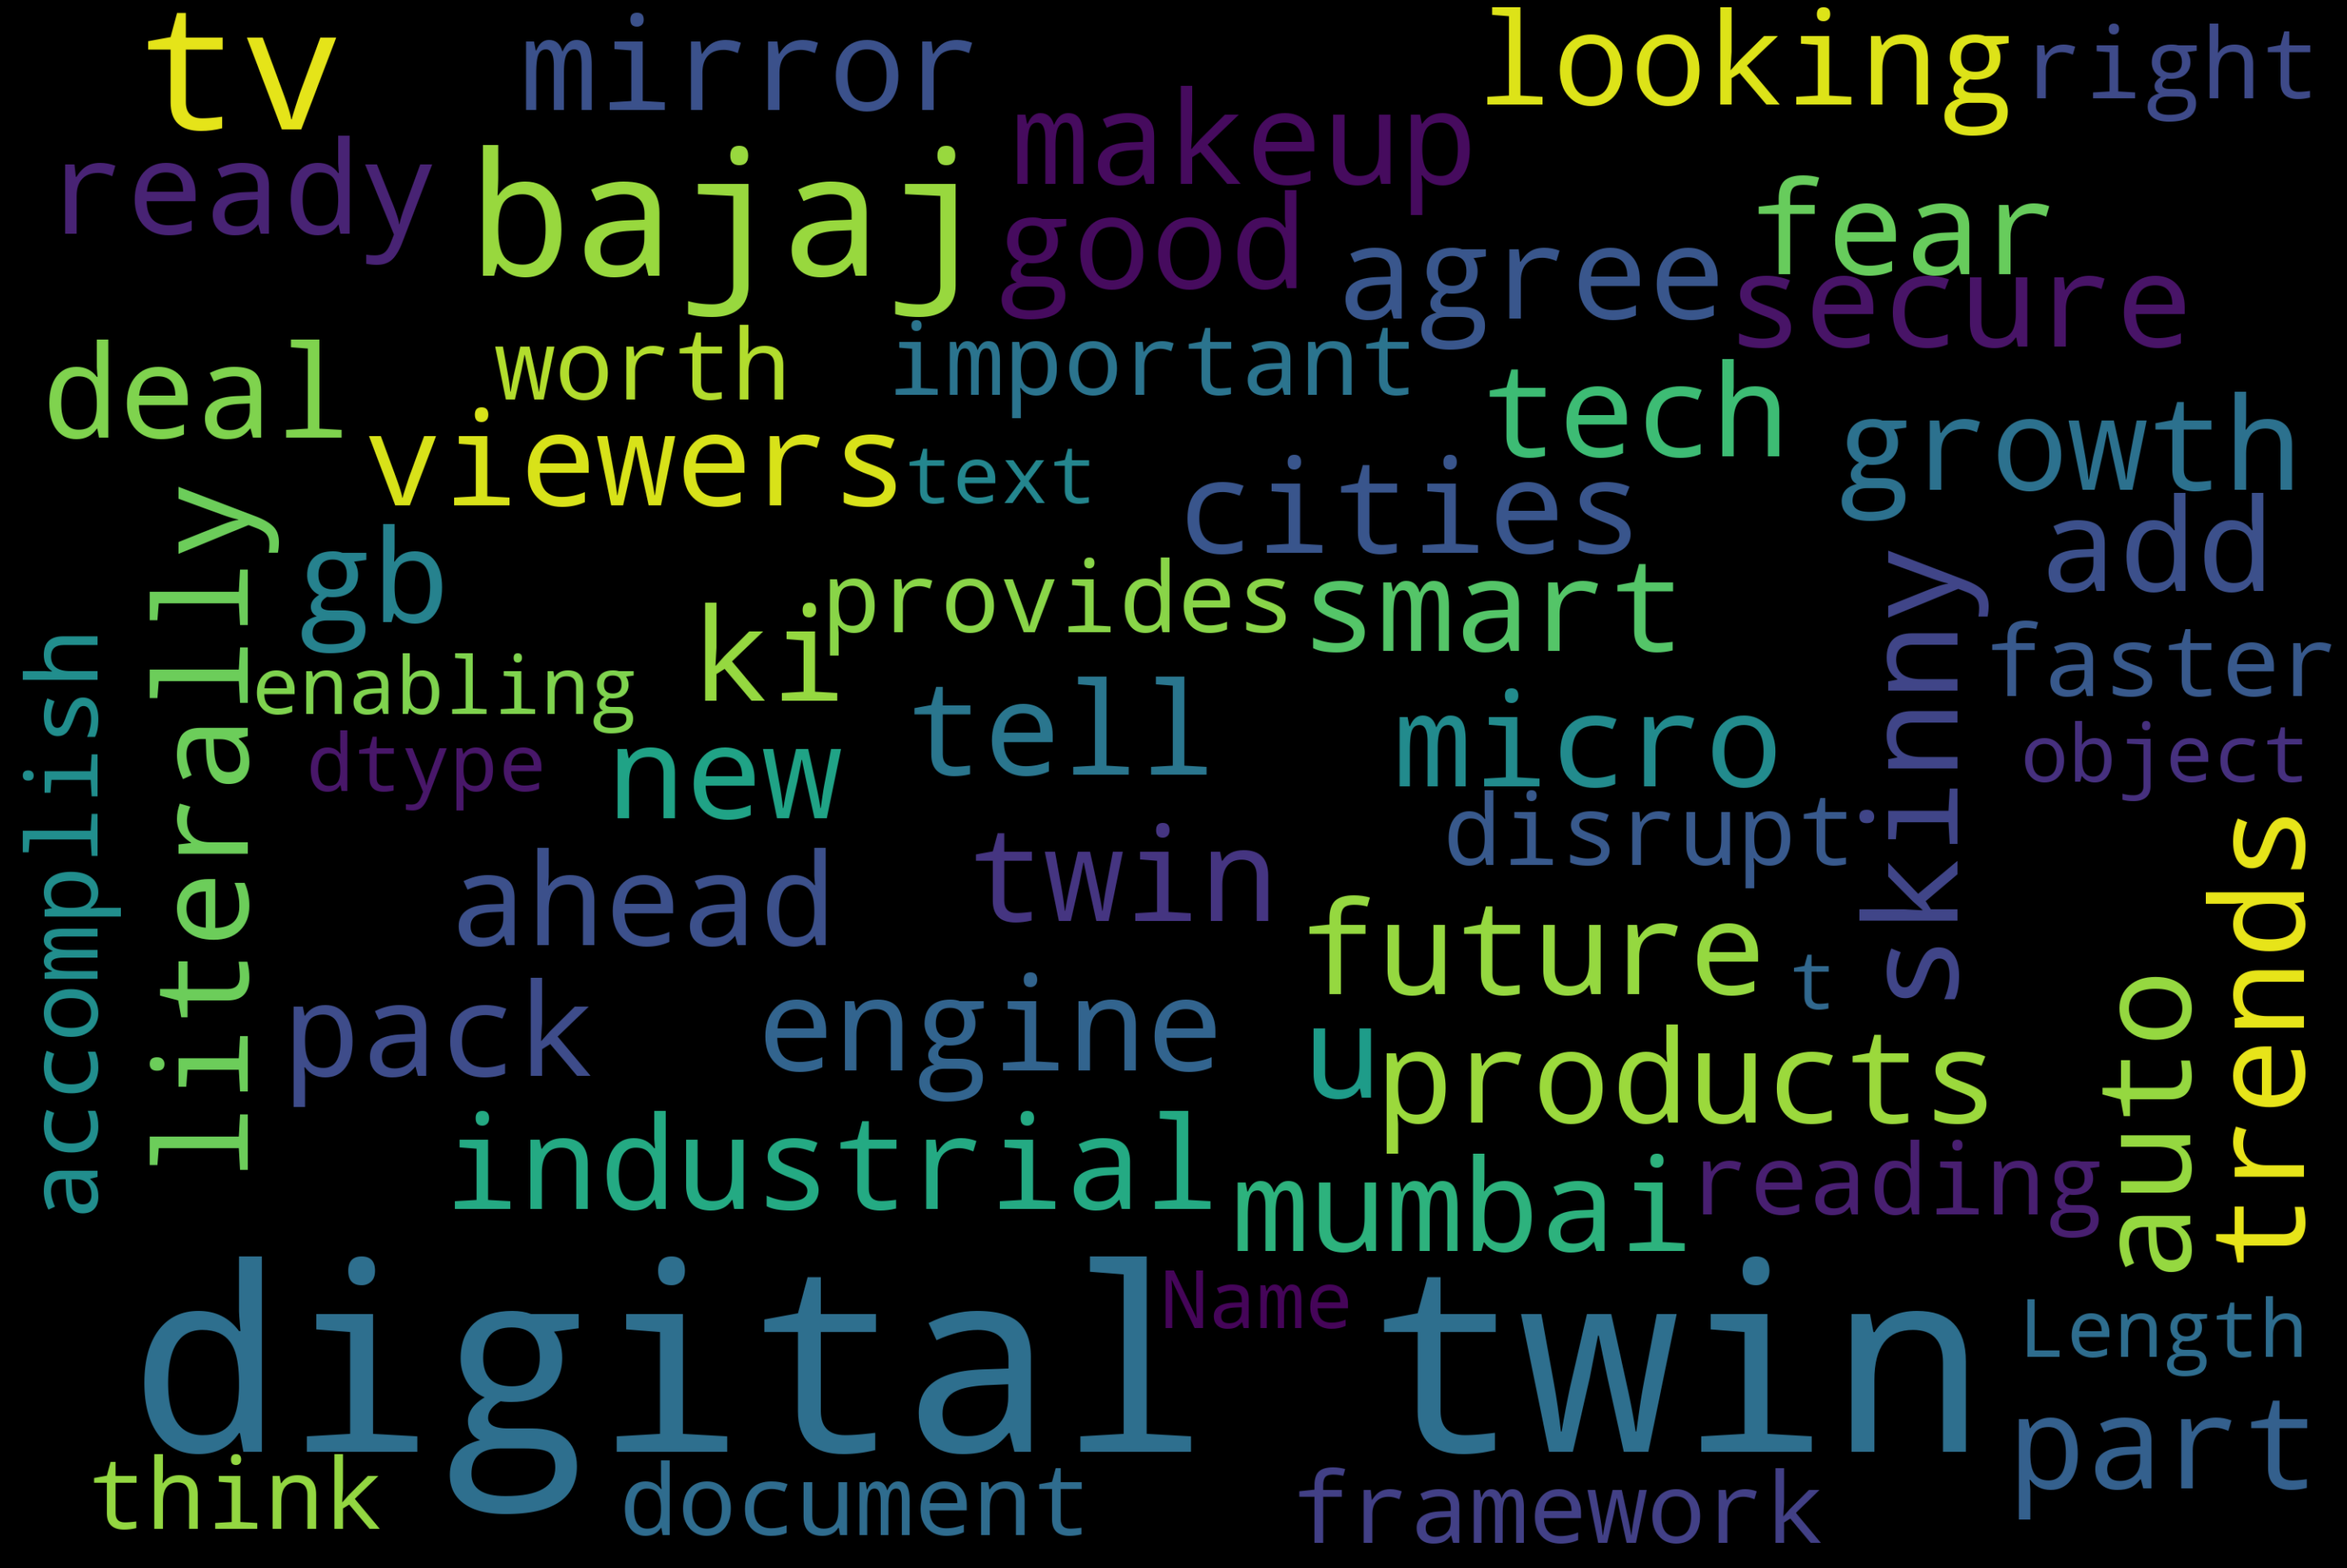

In [60]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(df_clean['text']))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [61]:
documents = df_clean['text']

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

true_k = 4
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")

Y = vectorizer.transform(["Azure is the leading IOT"])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["Data Analysis is a trend for amp"])
prediction = model.predict(Y)
print(prediction)

Top terms per cluster:
Cluster 0:
 twin
 digital
 technology
 market
 data
 new
 amp
 physical
 industry
 iot
Cluster 1:
 read
 smart
 digital
 twins
 cities
 twin
 blog
 technology
 article
 city
Cluster 2:
 twins
 digital
 iot
 azure
 data
 new
 amp
 industry
 use
 using
Cluster 3:
 amp
 new
 technology
 data
 digital
 learn
 future
 industry
 business
 great


Prediction
[3]
[3]
